<a href="https://colab.research.google.com/github/dushyantsinghraghav/Advanced-ML/blob/main/Kernalized_SVM_(Support_Vector_Machines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Summary of SVM with RBF Kernel

This notebook demonstrates the use of an **SVM** (Support Vector Machine) with an **RBF (Radial Basis Function) kernel** to classify non-linearly separable data. The key steps are outlined below:

1. **Generate Non-linearly Separable Data**:
   - Use `make_circles` to create a dataset of points forming two concentric circles.
   - Visualize the dataset using a scatter plot, showing that a linear decision boundary cannot separate the two classes.

2. **Train an SVM with RBF Kernel**:
   - Use `SVC` from `scikit-learn` with `kernel='rbf'` to fit the SVM model.
   - The **RBF kernel** maps data into a higher-dimensional space, enabling the SVM to learn a non-linear decision boundary.
   - Set `C` to control regularization and `gamma` to control the influence of individual points.

3. **Visualize the Decision Boundary**:
   - Create a mesh grid of points to plot the decision boundary.
   - Use `decision_function` to compute the distance of each point from the decision boundary.
   - Plot the decision boundary along with the data points, showing how the SVM classifies the two classes.

4. **Analyze the Result**:
   - The RBF kernel allows the SVM to create a **curved decision boundary** that effectively separates the classes.
   - The SVM finds a linear boundary in the transformed feature space, which corresponds to a non-linear boundary in the original space.

This approach demonstrates the power of the RBF kernel in handling complex, non-linear relationships in data, making SVMs a versatile tool for classification tasks.


In [30]:
##Lets implement the non linear SVC
from sklearn.datasets import make_blobs
X,y = make_blobs(centers = 4 , random_state = 8)
y = y%2

Text(0, 0.5, 'Feature 1')

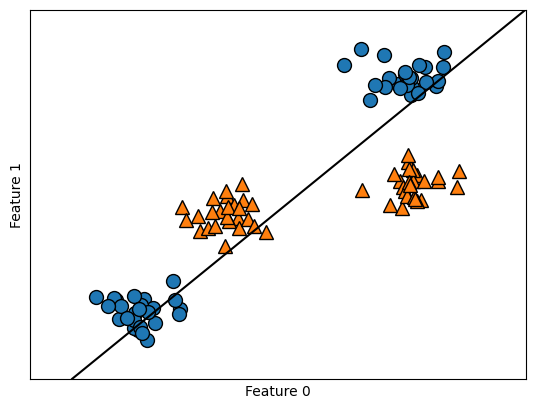

In [31]:
import sklearn
!pip install mglearn  # Install the mglearn library if not already installed
import mglearn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

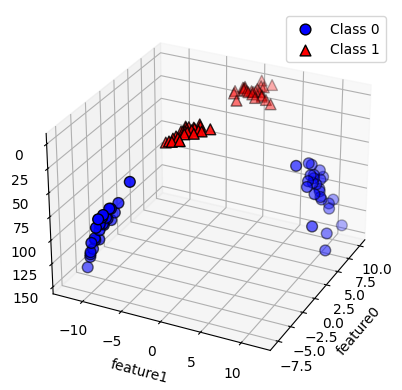

In [32]:
##Now lets add another feature to make it three dimensional and add square of first feature as the third feature and plot it
#add the squared feature
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X is already defined and y is the target array
# Create a new feature matrix with the original features and the squared second feature
X_new = np.hstack([X, X[:, 1:] ** 2])

# Create a new figure for 3D plotting
figure = plt.figure()

# Create a 3D subplot
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Create a mask for class separation (assuming binary classification)
mask = y == 0

# Plot points where y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k', label='Class 0')

# Plot points where y == 1
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k', label='Class 1')

# Set axis labels
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")

# Add a legend for clarity
ax.legend()

# Show the plot
plt.show()


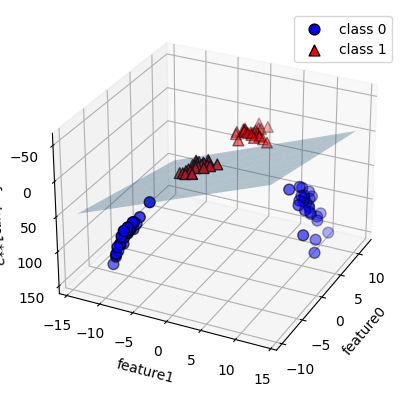

In [33]:
## in the new representation of the data we can linearly separate them
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC

# Assuming X_new and y are already defined, with X_new being the modified feature matrix

# Train a linear SVM on the transformed data
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_, linear_svm_3d.intercept_

# Create a new figure for the 3D plot
figure = plt.figure()

# Create a 3D subplot
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Generate a mesh grid for the plane
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)

# Calculate the decision boundary surface
# Prevent division by zero in the calculation
if coef[0][2] != 0:
    ZZ = (coef[0][0] * XX + coef[0][1] * YY + intercept) / -coef[0][2]
else:
    ZZ = XX * 0  # If coef[0][2] is zero, just set ZZ as a flat plane

# Plot the decision boundary
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# Plot points for each class
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k', label='class 0')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k', label='class 1')

# Set axis labels
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")

# Add a legend for class labels
ax.legend()

# Display the plot
plt.show()


[ -8.84395724  -8.78680564  -8.72965405 ... -11.67760345 -11.62045185
 -11.56330026]


Text(0, 0.5, 'feature1')

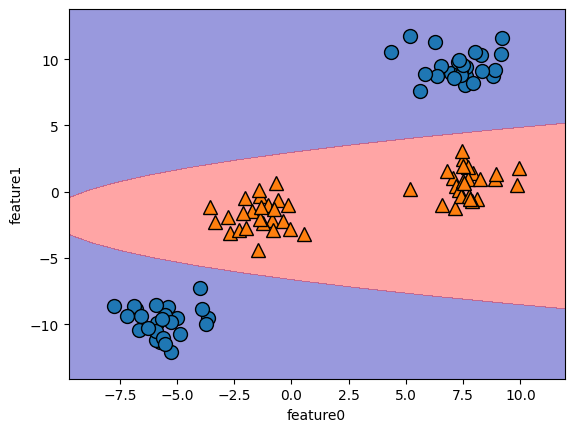

In [37]:
# the linearSVM is not linear anymore
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
print(dec)
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature0")
plt.ylabel("feature1")

In [35]:
print(dec.reshape(XX.shape))

[[ -8.84395724  -8.78680564  -8.72965405 ...  -6.15783231  -6.10068071
   -6.04352912]
 [ -8.0329581   -7.97580651  -7.91865491 ...  -5.34683317  -5.28968158
   -5.23252998]
 [ -7.26044428  -7.20329268  -7.14614109 ...  -4.57431935  -4.51716775
   -4.46001616]
 ...
 [-12.32962185 -12.27247026 -12.21531866 ...  -9.64349692  -9.58634533
   -9.52919373]
 [-13.32743246 -13.27028086 -13.21312927 ... -10.64130753 -10.58415593
  -10.52700434]
 [-14.36372838 -14.30657678 -14.24942519 ... -11.67760345 -11.62045185
  -11.56330026]]


Text(0, 0.5, 'feature1')

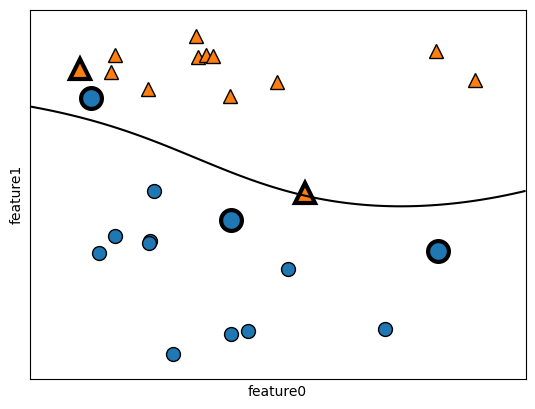

In [42]:
##lets makes use of polynomial and use guassian kernel
from sklearn.svm import SVC
X , y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf' , C = 10 , gamma = 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps = 0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#plot support vectors
sv = svm.support_vectors_
#plot support vectors
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s = 15,markeredgewidth = 3)
plt.xlabel("feature0")
plt.ylabel("feature1")

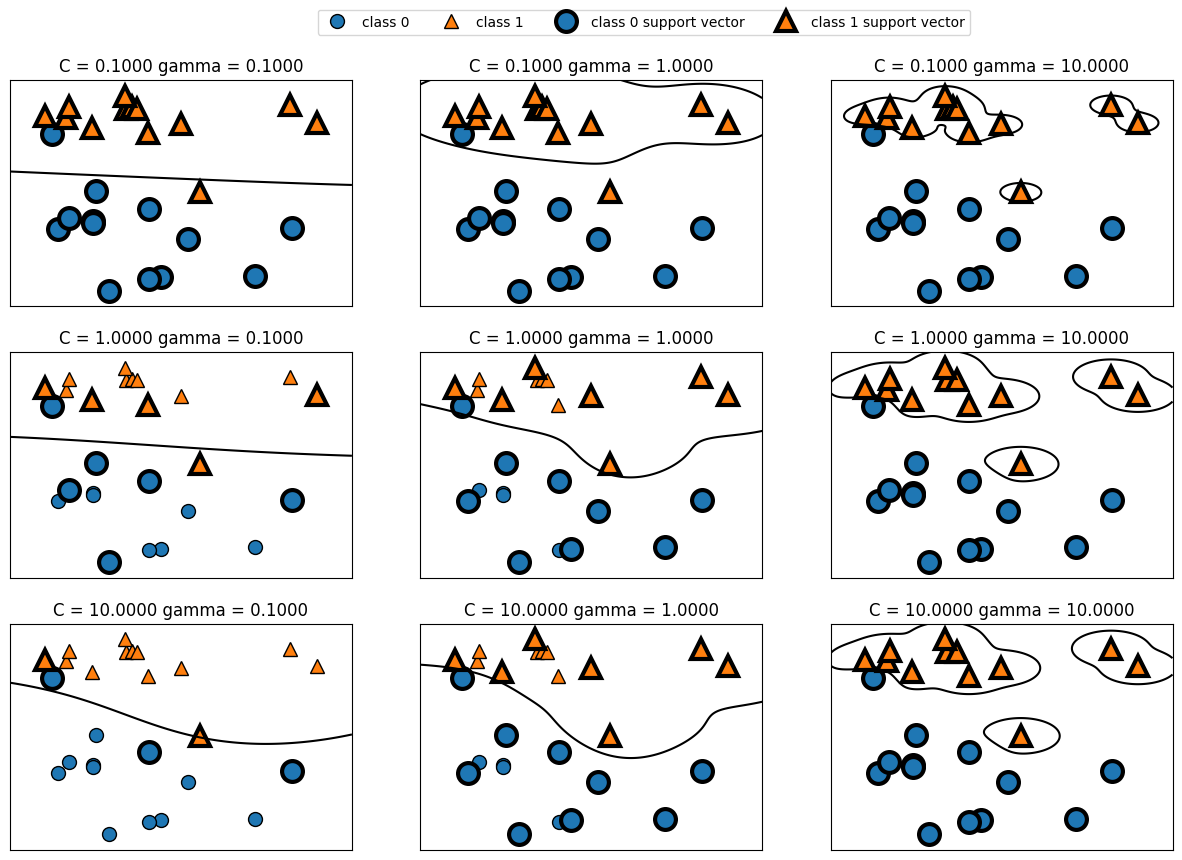

In [43]:
##lets see how gamma affects the plots and take an example of multiple plots which can help us understand the
## guassian kernel k(x1,x2)= exp(-gamma (|(x1-x2)^2) this formula is being used for the guassian kernel
fig,axes = plt.subplots(3,3,figsize = (15,10))
for ax,C in zip(axes,range(-1,4)):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C = C,log_gamma = gamma,ax = a)
axes[0,0].legend(["class 0","class 1","class 0 support vector","class 1 support vector"],ncol = 4,loc = (0.9,1.2))

In [47]:
##lets train the model on the SVM now
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test , y_train , y_test = train_test_split(cancer.data,cancer.target,random_state = 0)
svc = SVC()
svc.fit(X_train,y_train)
print("accuracy on training set : {:.2f}".format(svc.score(X_train,y_train)))
print("accuracy on test set : {:.2f}".format(svc.score(X_test,y_test)))

accuracy on training set : 0.90
accuracy on test set : 0.94


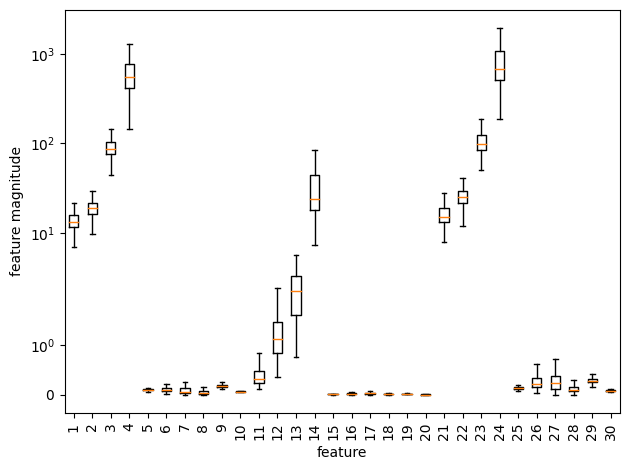

In [49]:
##lets visualise some boxplots
import matplotlib.pyplot as plt

##lets visualise some boxplots
plt.boxplot(X_train, showfliers=False) # Remove manage_xticks and potentially suppress outliers with showfliers=False
plt.xlabel("feature")
plt.ylabel("feature magnitude")
plt.yscale("symlog")

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [50]:
##lets resolve the above issue by rescaling the feature before training them i.e doing the preprocessing
## to scale the features values and then train them
#compute the maximum value per feature on the training set
min_on_training = X_train.min(axis =0)
#compute the range of each feature
range_on_training = (X_train - min_on_training).max(axis = 0)
#subtract the minium and divide by range
X_train_scaled = (X_train - min_on_training) / range_on_training
print("minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [51]:
##use the same transformation on the test set and then train the model using SVM
#use min and range of training sets
X_test_scaled = (X_test - min_on_training) / range_on_training
print("scaled minimum for each feature\n{}".format(X_test_scaled.min(axis=0)))
#Now train the model on the training set and make predictions on the test set
svc = SVC()
svc.fit(X_train_scaled , y_train)
print("accuracy on training set : {:.2f}".format(svc.score(X_train_scaled,y_train)))
print("accuracy on test set : {:.2f}".format(svc.score(X_test_scaled,y_test)))

scaled minimum for each feature
[ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
accuracy on training set : 0.98
accuracy on test set : 0.97


In [54]:
#lets use C=1000
svc = SVC(C=10)
svc.fit(X_train_scaled , y_train)
print("accuracy on training set : {:.2f}".format(svc.score(X_train_scaled,y_train)))
print("accuracy on test set : {:.2f}".format(svc.score(X_test_scaled,y_test)))

accuracy on training set : 0.99
accuracy on test set : 0.97
